## Data import and preparation

In [1]:
# DATA IMPORT
import pandas as pd

dftrain = pd.read_csv('train_20D8GL3.csv')
dftrain

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,6283,50000,2,2,2,31,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
20996,25589,80000,2,2,1,37,0,0,0,0,...,45458,48679,49895,5000,3000,2000,4000,2000,2000,0
20997,4378,100000,1,1,1,52,1,2,2,2,...,23440,28843,31353,0,3600,0,6000,3000,0,1
20998,8604,90000,2,2,1,47,0,0,0,0,...,28747,29177,29452,2000,2000,2000,2000,2000,2000,0


## Descriptive Statistics

In [2]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

**Tidak ada missing data pada dataset train.**

Dapat dilihat bahwa field ID, SEX, EDUCATION, MARRIAGE, AGE, dan PAY_0 hingga PAY_6 memiliki tipe data int64. Walaupun data tersebut berisikan angka (numerik), tetapi jenis fiel tersebut merupakan data kategorikal yang seharusnya bertipe object. Sebaiknya tipe data tersebut diubah agar tidak terjadi kesalahan processing.

In [3]:
# Transforming data type

for i in ['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
  dftrain[i] = dftrain[i].astype('object')

In [4]:
dftrain[['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         21000 non-null  object
 1   SEX        21000 non-null  object
 2   EDUCATION  21000 non-null  object
 3   MARRIAGE   21000 non-null  object
 4   AGE        21000 non-null  object
 5   PAY_0      21000 non-null  object
 6   PAY_2      21000 non-null  object
 7   PAY_3      21000 non-null  object
 8   PAY_4      21000 non-null  object
 9   PAY_5      21000 non-null  object
 10  PAY_6      21000 non-null  object
dtypes: object(11)
memory usage: 1.8+ MB


Kolom ID, SEX, EDUCATION, MARRIAGE, AGE, dan PAY_0 hingga PAY_6 telah disesuaikan data typenya.

In [5]:
# Check the duplicated data
if dftrain.duplicated().sum() == 0: print('Tidak ada data duplikat')
else : print(f'Terdapat data duplikat sebesar{dftrain.duplicated().sum()}')

Tidak ada data duplikat


In [6]:
# Descriptive Statistics
numerical_vars = ['LIMIT_BAL', 'AGE']
dftrain[numerical_vars].describe()

,LIMIT_BAL
count,21000.000000
mean,167214.746667
std,128965.188482
min,10000.000000
25%,50000.000000
50%,140000.000000
75%,240000.000000
max,800000.000000


Limit 

In [7]:
bill_vars = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
dftrain[bill_vars].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000
mean,51501.542381,49463.502667,4.723258e+04,43387.372476,40398.551095,38931.194000
std,73453.641859,70866.586004,6.953988e+04,64081.073110,60396.811177,59196.499234
min,-14386.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000
25%,3564.750000,3000.000000,2.686250e+03,2332.000000,1759.000000,1242.750000
50%,22578.000000,21550.000000,2.024200e+04,19158.500000,18266.500000,17203.500000
75%,67876.250000,64918.250000,6.082675e+04,55376.750000,50517.250000,49463.000000
max,746814.000000,743970.000000,1.664089e+06,706864.000000,587067.000000,699944.000000


In [8]:
pay_vars = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
dftrain[pay_vars].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000
mean,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762
std,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000
50%,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000
75%,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000
max,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000


## Univariate Analysis

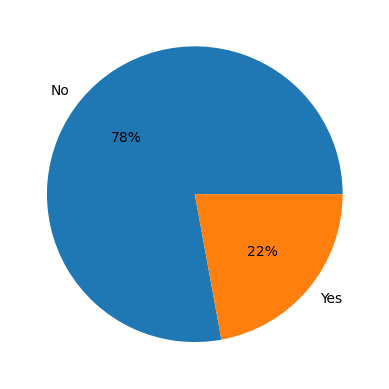

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt

default_payment_next_month_count = dftrain.replace({1:'Yes', 0:'No'})
default_payment_next_month_count = default_payment_next_month_count.groupby('default_payment_next_month').agg(count = ('ID', 'nunique')).reset_index()
plt.pie(default_payment_next_month_count['count'], labels = default_payment_next_month_count['default_payment_next_month'], autopct='%.0f%%')
plt.show()

Terdapat 22% nasabah yang mengalami peyment default.

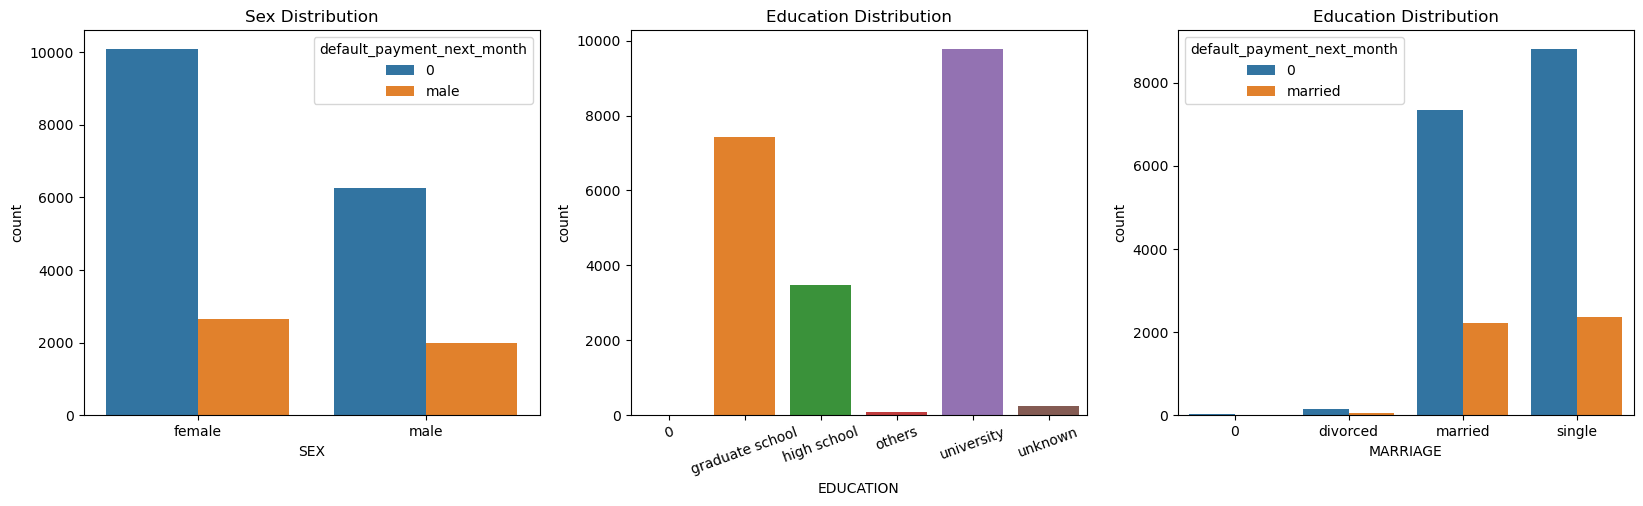

In [10]:
categorical_plot, axes = plt.subplots(ncols=3, figsize=(20, 5))

sex_count = dftrain.replace({1:'male', 2:'female'})
sex_count = sex_count.groupby(['SEX', 'default_payment_next_month']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'SEX', y = 'count', hue = 'default_payment_next_month', data = sex_count, ax = axes[0])
axes[0].set_title('Sex Distribution')

edu_count = dftrain.replace({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others', 5 : 'unknown', 6 : 'unknown'})
edu_count = edu_count.groupby('EDUCATION').agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'EDUCATION', y = 'count', data = edu_count, ax = axes[1])
axes[1].set_title('Education Distribution')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=20)

marriage_count = dftrain.replace({1 : 'married', 2 : 'single', 3 : 'divorced'})
marriage_count = marriage_count.groupby(['MARRIAGE', 'default_payment_next_month']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'MARRIAGE', y = 'count', hue = 'default_payment_next_month', data = marriage_count, ax = axes[2])
axes[2].set_title('Education Distribution')

categorical_plot.subplots_adjust(wspace=0.2)

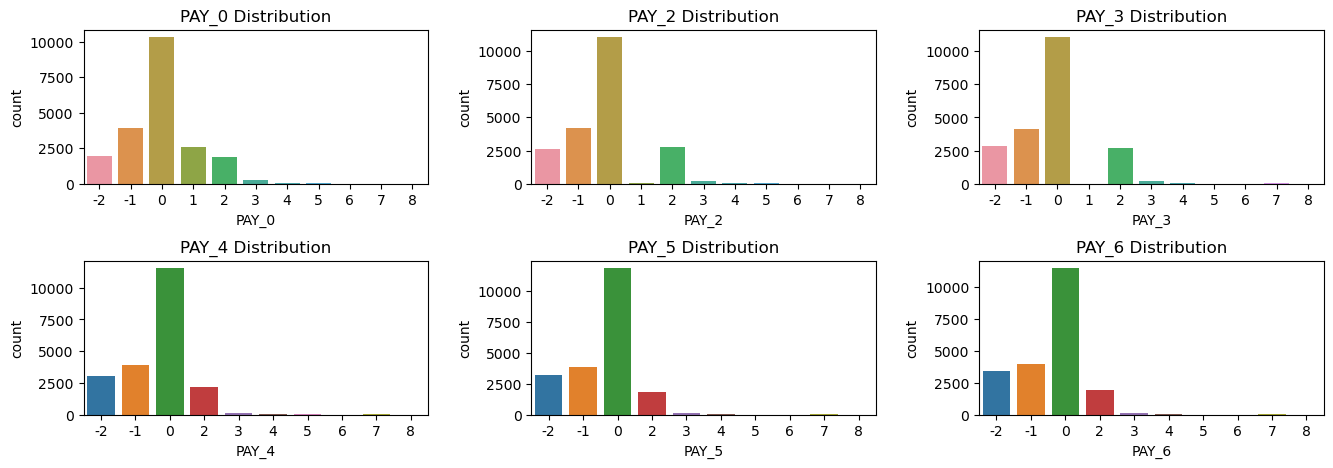

In [11]:
payment_default_plot, axes = plt.subplots(nrows = 2, ncols=3, figsize=(16, 5))

PAY_0_count = dftrain.groupby(['PAY_0']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAY_0', y = 'count', data = PAY_0_count, ax = axes[0,0])
axes[0,0].set_title('PAY_0 Distribution')

PAY_2_count = dftrain.groupby(['PAY_2']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAY_2', y = 'count', data = PAY_2_count, ax = axes[0,1])
axes[0,1].set_title('PAY_2 Distribution')

PAY_3_count = dftrain.groupby(['PAY_3']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAY_3', y = 'count', data = PAY_3_count, ax = axes[0,2])
axes[0,2].set_title('PAY_3 Distribution')

PAY_4_count = dftrain.groupby(['PAY_4']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAY_4', y = 'count', data = PAY_4_count, ax = axes[1,0])
axes[1,0].set_title('PAY_4 Distribution')

PAY_5_count = dftrain.groupby(['PAY_5']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAY_5', y = 'count', data = PAY_5_count, ax = axes[1,1])
axes[1,1].set_title('PAY_5 Distribution')

PAY_6_count = dftrain.groupby(['PAY_6']).agg(count = ('ID', 'nunique')).reset_index()
sns.barplot(x = 'PAY_6', y = 'count', data = PAY_6_count, ax = axes[1,2])
axes[1,2].set_title('PAY_6 Distribution')

payment_default_plot.subplots_adjust(wspace=0.3, hspace = 0.5)

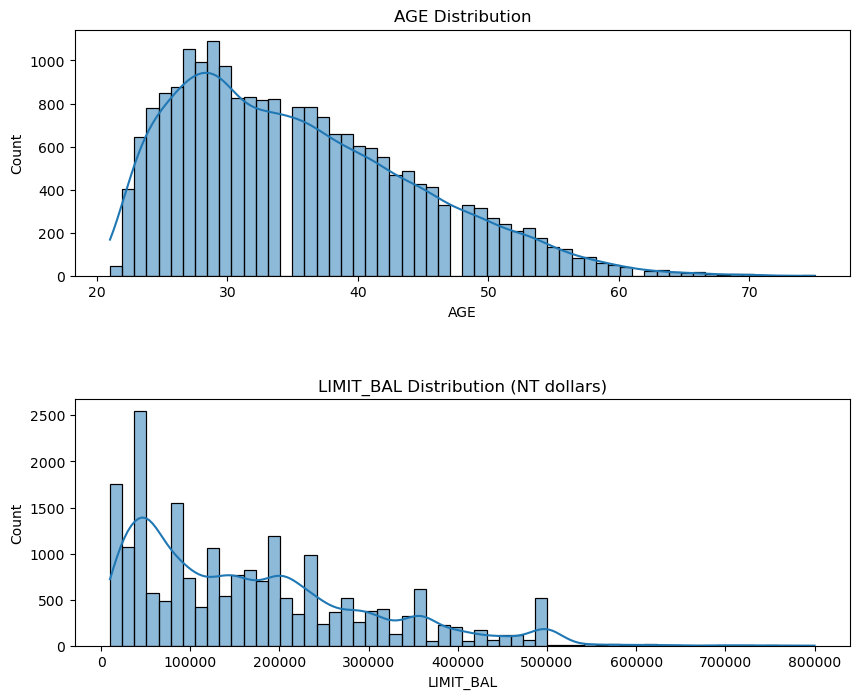

In [12]:
numerical_plot, axs = plt.subplots(nrows=2, figsize=(10, 8))

sns.histplot(dftrain['AGE'], kde = True, ax = axs[0])
axs[0].set_title('AGE Distribution')

sns.histplot(dftrain['LIMIT_BAL'], kde = True, ax = axs[1])
axs[1].set_title('LIMIT_BAL Distribution (NT dollars)')

numerical_plot.subplots_adjust(hspace=0.5)


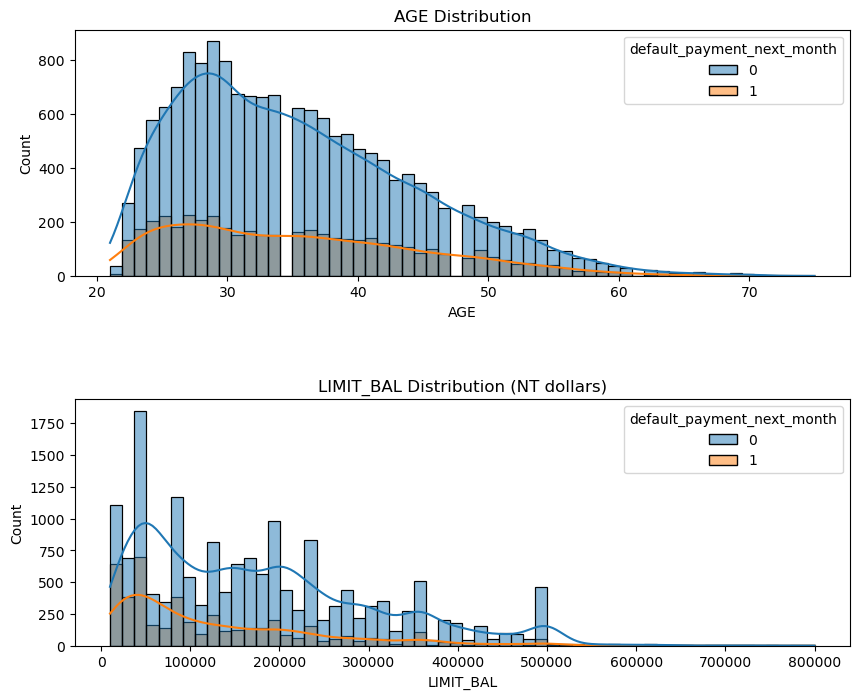

In [13]:
numerical_default_plot, axs = plt.subplots(nrows=2, figsize=(10, 8))

sns.histplot(dftrain, x='AGE', hue='default_payment_next_month', kde = True, ax = axs[0])
axs[0].set_title('AGE Distribution')

sns.histplot(dftrain, x = 'LIMIT_BAL',hue='default_payment_next_month', kde = True, ax = axs[1])
axs[1].set_title('LIMIT_BAL Distribution (NT dollars)')

numerical_default_plot.subplots_adjust(hspace=0.5)

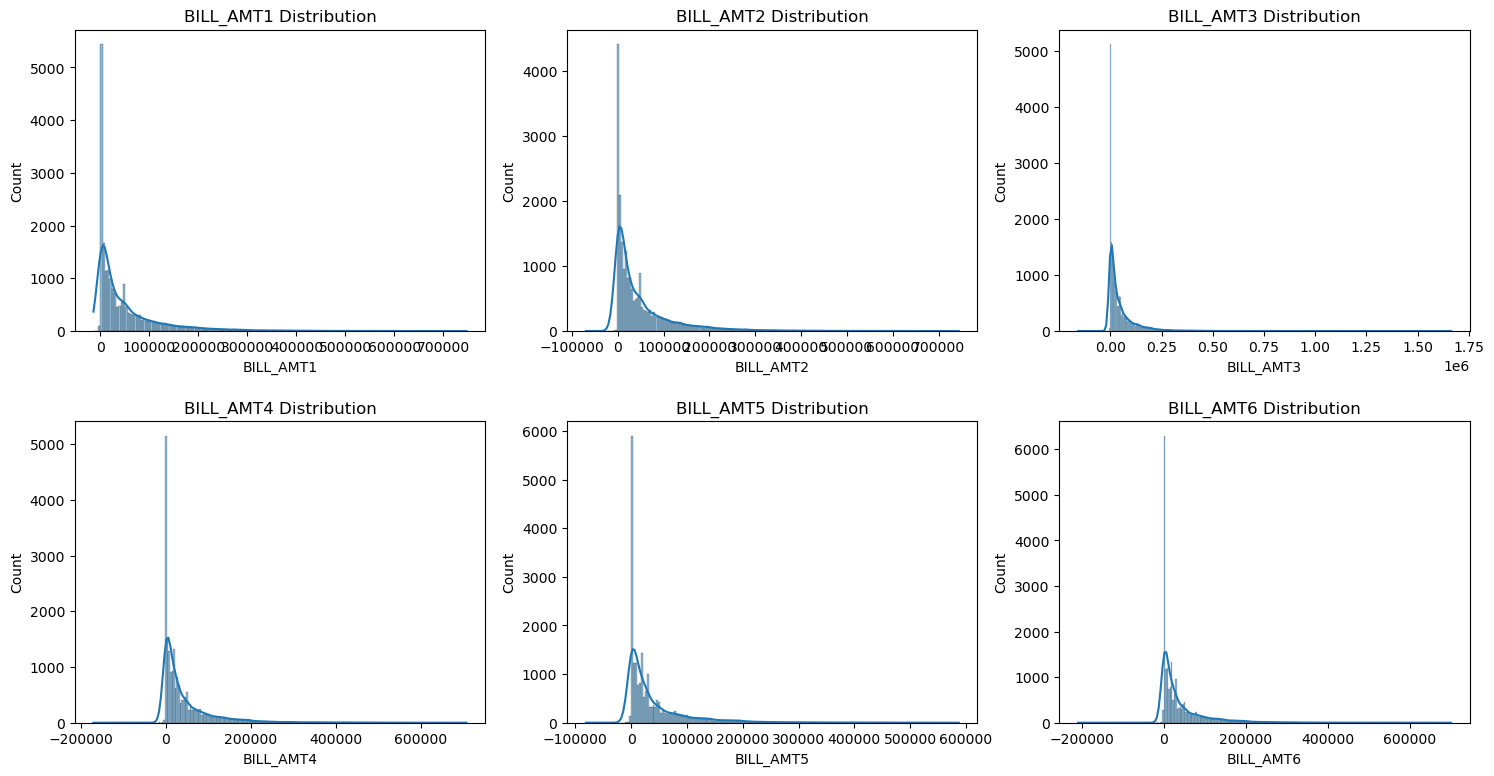

In [14]:
# BILL Distribution
bill_plot, axs = plt.subplots(ncols = 3, nrows=2, figsize=(18, 9))

sns.histplot(dftrain['BILL_AMT1'], kde = True, ax = axs[0,0])
axs[0,0].set_title('BILL_AMT1 Distribution')
sns.histplot(dftrain['BILL_AMT2'], kde = True, ax = axs[0,1])
axs[0,1].set_title('BILL_AMT2 Distribution')
sns.histplot(dftrain['BILL_AMT3'], kde = True, ax = axs[0,2])
axs[0,2].set_title('BILL_AMT3 Distribution')
sns.histplot(dftrain['BILL_AMT4'], kde = True, ax = axs[1,0])
axs[1,0].set_title('BILL_AMT4 Distribution')
sns.histplot(dftrain['BILL_AMT5'], kde = True, ax = axs[1,1])
axs[1,1].set_title('BILL_AMT5 Distribution')
sns.histplot(dftrain['BILL_AMT6'], kde = True, ax = axs[1,2])
axs[1,2].set_title('BILL_AMT6 Distribution')

bill_plot.subplots_adjust(hspace=0.3)

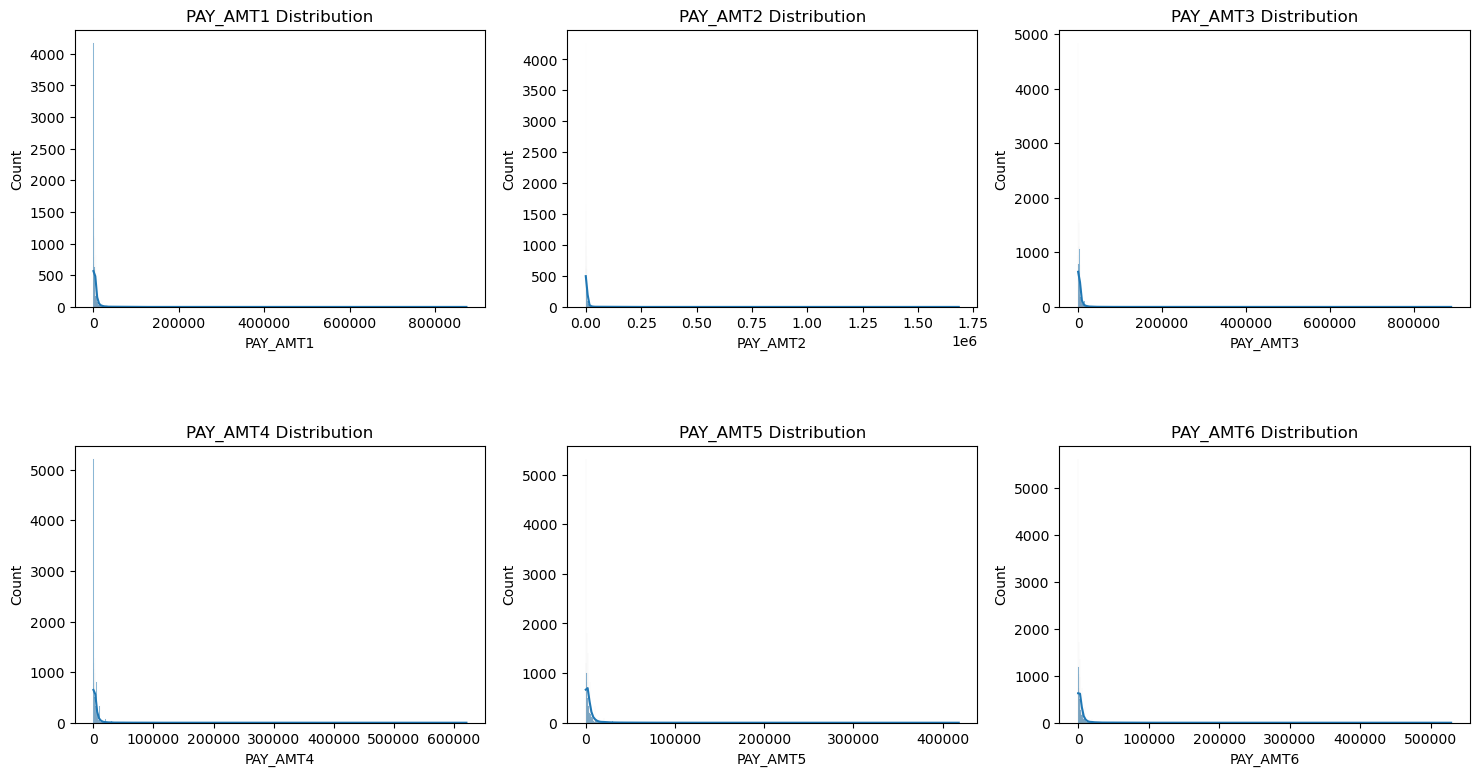

In [15]:
# PAY Distribution
pay_plot, axs = plt.subplots(ncols = 3, nrows=2, figsize=(18, 9))

sns.histplot(dftrain['PAY_AMT1'], kde = True, ax = axs[0,0])
axs[0,0].set_title('PAY_AMT1 Distribution')
sns.histplot(dftrain['PAY_AMT2'], kde = True, ax = axs[0,1])
axs[0,1].set_title('PAY_AMT2 Distribution')
sns.histplot(dftrain['PAY_AMT3'], kde = True, ax = axs[0,2])
axs[0,2].set_title('PAY_AMT3 Distribution')
sns.histplot(dftrain['PAY_AMT4'], kde = True, ax = axs[1,0])
axs[1,0].set_title('PAY_AMT4 Distribution')
sns.histplot(dftrain['PAY_AMT5'], kde = True, ax = axs[1,1])
axs[1,1].set_title('PAY_AMT5 Distribution')
sns.histplot(dftrain['PAY_AMT6'], kde = True, ax = axs[1,2])
axs[1,2].set_title('PAY_AMT6 Distribution')

pay_plot.subplots_adjust(hspace=0.5)

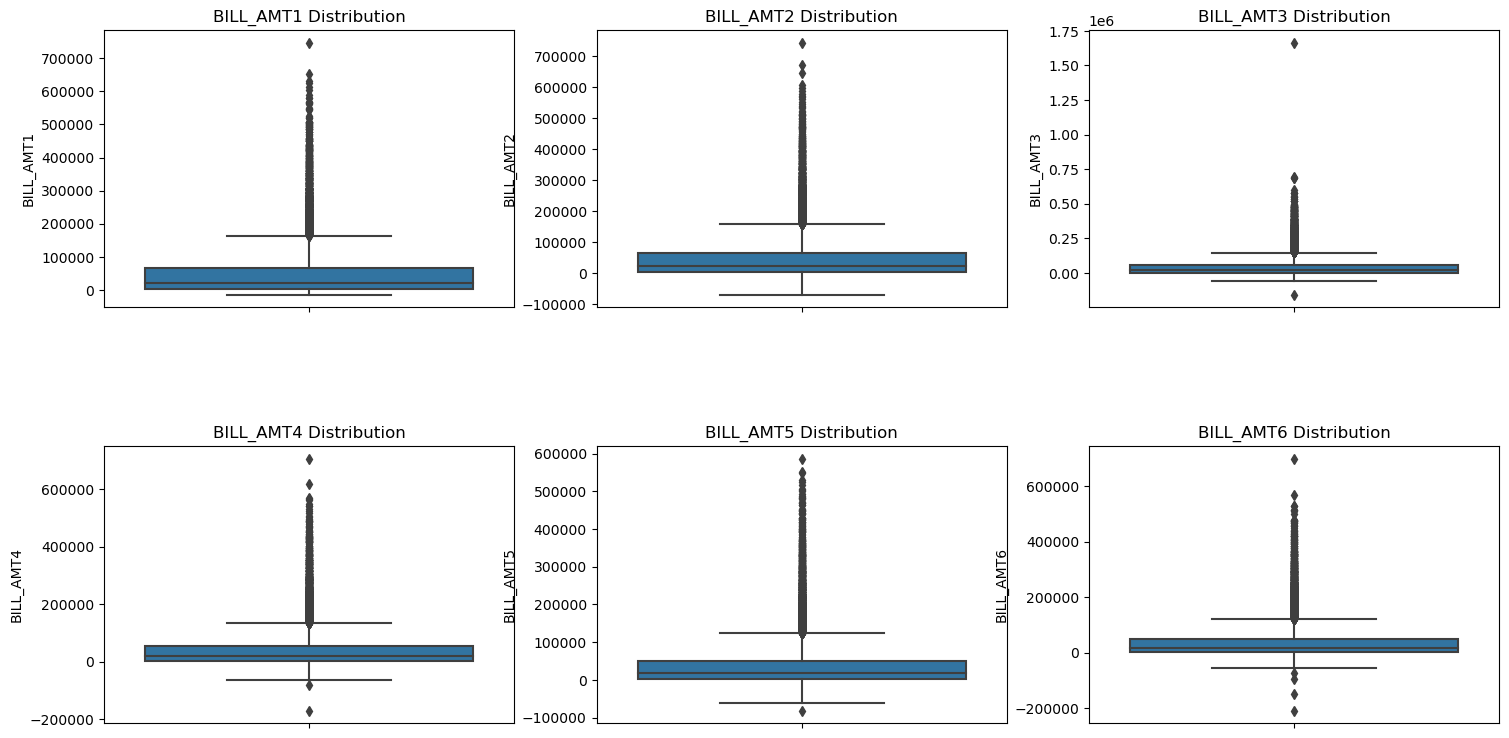

In [16]:
# BILL BOX PLOT
pay_boxplot, axs = plt.subplots(ncols = 3, nrows=2, figsize=(18, 9))

sns.boxplot(y = dftrain['BILL_AMT1'], ax = axs[0,0])
axs[0,0].set_title('BILL_AMT1 Distribution')
sns.boxplot(y = dftrain['BILL_AMT2'], ax = axs[0,1])
axs[0,1].set_title('BILL_AMT2 Distribution')
sns.boxplot(y = dftrain['BILL_AMT3'], ax = axs[0,2])
axs[0,2].set_title('BILL_AMT3 Distribution')
sns.boxplot(y = dftrain['BILL_AMT4'], ax = axs[1,0])
axs[1,0].set_title('BILL_AMT4 Distribution')
sns.boxplot(y = dftrain['BILL_AMT5'], ax = axs[1,1])
axs[1,1].set_title('BILL_AMT5 Distribution')
sns.boxplot(y = dftrain['BILL_AMT6'], ax = axs[1,2])
axs[1,2].set_title('BILL_AMT6 Distribution')

pay_boxplot.subplots_adjust(hspace=0.5)

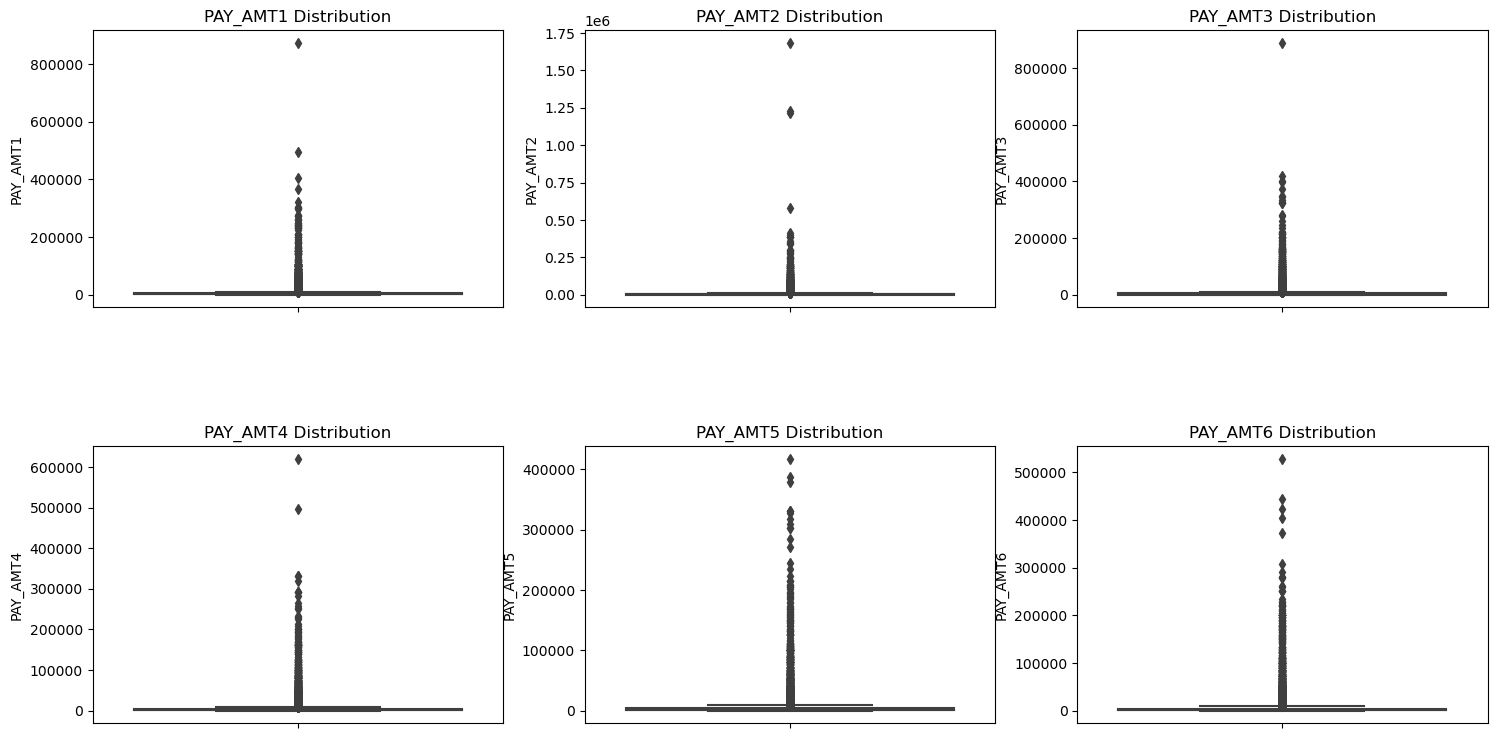

In [17]:
# PAY BOX PLOT
pay_boxplot, axs = plt.subplots(ncols = 3, nrows=2, figsize=(18, 9))

sns.boxplot(y = dftrain['PAY_AMT1'], ax = axs[0,0])
axs[0,0].set_title('PAY_AMT1 Distribution')
sns.boxplot(y = dftrain['PAY_AMT2'], ax = axs[0,1])
axs[0,1].set_title('PAY_AMT2 Distribution')
sns.boxplot(y = dftrain['PAY_AMT3'], ax = axs[0,2])
axs[0,2].set_title('PAY_AMT3 Distribution')
sns.boxplot(y = dftrain['PAY_AMT4'], ax = axs[1,0])
axs[1,0].set_title('PAY_AMT4 Distribution')
sns.boxplot(y = dftrain['PAY_AMT5'], ax = axs[1,1])
axs[1,1].set_title('PAY_AMT5 Distribution')
sns.boxplot(y = dftrain['PAY_AMT6'], ax = axs[1,2])
axs[1,2].set_title('PAY_AMT6 Distribution')

pay_boxplot.subplots_adjust(hspace=0.5)

##  Multivariate Analysis